In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math as m
import os
import hashlib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.5f}'.format

filepath = os.path.join(os.getcwd(),"Data")
labeled_dataset = pd.read_csv(os.path.join(filepath,"train.csv"), index_col = None)
"Dataset Size (Rows, Columns): " + str(labeled_dataset.shape)

'Dataset Size (Rows, Columns): (188318, 132)'

In [2]:
labeled_dataset.head(n=7) #mix of categorical and continuous variables

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.71837,0.33506,0.30260,0.67135,0.83510,0.56974,0.59465,0.82249,0.71484,2213.18000
1,2,A,B,A,A,A,A,A,A,B,...,0.43892,0.43659,0.60087,0.35127,0.43919,0.33831,0.36631,0.61143,0.30450,1283.60000
2,5,A,B,A,A,B,A,A,A,B,...,0.28965,0.31554,0.27320,0.26076,0.32446,0.38140,0.37342,0.19571,0.77443,3005.09000
3,10,B,B,A,B,A,A,A,A,B,...,0.44094,0.39113,0.31796,0.32128,0.44467,0.32792,0.32157,0.60508,0.60264,939.85000
4,11,A,B,A,B,A,A,A,A,B,...,0.17819,0.24741,0.24564,0.22089,0.21230,0.20469,0.20221,0.24601,0.43261,2763.85000
5,13,A,B,A,A,A,A,A,A,B,...,0.36446,0.40116,0.26847,0.46226,0.50556,0.36679,0.35925,0.34525,0.72679,5142.87000
6,14,A,A,A,A,B,A,A,A,A,...,0.38151,0.36377,0.24564,0.40455,0.47225,0.33483,0.35225,0.34224,0.38293,1132.22000


In [3]:
labeled_dataset.isnull().sum().sum() #no missing data!

0

In [4]:
cont_dataset = labeled_dataset.iloc[:,-15:].copy()
cont_dataset.head(n=7)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.72630,0.24592,0.18758,0.78964,0.31006,0.71837,0.33506,0.30260,0.67135,0.83510,0.56974,0.59465,0.82249,0.71484,2213.18000
1,0.33051,0.73707,0.59268,0.61413,0.88583,0.43892,0.43659,0.60087,0.35127,0.43919,0.33831,0.36631,0.61143,0.30450,1283.60000
2,0.26184,0.35832,0.48420,0.23692,0.39707,0.28965,0.31554,0.27320,0.26076,0.32446,0.38140,0.37342,0.19571,0.77443,3005.09000
3,0.32159,0.55578,0.52799,0.37382,0.42227,0.44094,0.39113,0.31796,0.32128,0.44467,0.32792,0.32157,0.60508,0.60264,939.85000
4,0.27320,0.15999,0.52799,0.47320,0.70427,0.17819,0.24741,0.24564,0.22089,0.21230,0.20469,0.20221,0.24601,0.43261,2763.85000
5,0.54667,0.68176,0.63422,0.37382,0.30268,0.36446,0.40116,0.26847,0.46226,0.50556,0.36679,0.35925,0.34525,0.72679,5142.87000
6,0.47145,0.73707,0.61366,0.18914,0.29540,0.38151,0.36377,0.24564,0.40455,0.47225,0.33483,0.35225,0.34224,0.38293,1132.22000


In [5]:
cont_dataset.describe() #excluding loss, all the continuous variables are between 0 and 1-ish.

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000
mean,0.49386,0.50719,0.49892,0.49181,0.48743,0.49094,0.48497,0.48644,0.48551,0.49807,0.49351,0.49315,0.49314,0.49572,3037.33769
std,0.18764,0.20720,0.20210,0.21129,0.20903,0.20527,0.17845,0.19937,0.18166,0.18588,0.20974,0.20943,0.21278,0.22249,2904.08619
min,0.00002,0.00115,0.00263,0.17692,0.28114,0.01268,0.06950,0.23688,0.00008,0.00000,0.03532,0.03623,0.00023,0.17972,0.67000
25%,0.34609,0.35832,0.33696,0.32735,0.28114,0.33611,0.35018,0.31280,0.35897,0.36458,0.31096,0.31166,0.31576,0.29461,1204.46000
50%,0.47578,0.55578,0.52799,0.45289,0.42227,0.44094,0.43829,0.44106,0.44145,0.46119,0.45720,0.46229,0.36355,0.40740,2115.57000
75%,0.62391,0.68176,0.63422,0.65207,0.64331,0.65502,0.59104,0.62358,0.56682,0.61459,0.67892,0.67576,0.68997,0.72462,3864.04500
max,0.98498,0.86265,0.94425,0.95430,0.98367,0.99716,1.00000,0.98020,0.99540,0.99498,0.99874,0.99848,0.98849,0.84485,121012.25000


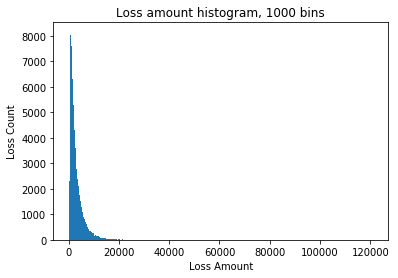

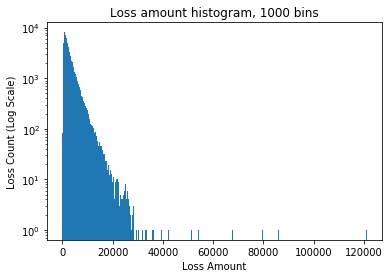

In [6]:
plt.hist(cont_dataset.loss, 1000);
plt.title("Loss amount histogram, 1000 bins");
plt.xlabel("Loss Amount");
plt.ylabel("Loss Count");
plt.show();

plt.hist(cont_dataset.loss, 1000);
plt.title("Loss amount histogram, 1000 bins");
plt.xlabel("Loss Amount");
plt.ylabel("Loss Count (Log Scale)");
plt.yscale("log");
plt.show(); #loss amounts are heavily skewed to the right

In [7]:
cont_dataset['logloss'] = np.log(cont_dataset['loss'])

cont_scaler = StandardScaler()
loss_scaler = StandardScaler()

cont_dataset_var = cont_dataset.iloc[:,:15].copy()
cont_dataset_var = pd.DataFrame(cont_scaler.fit_transform(cont_dataset_var),columns=cont_dataset_var.columns)
cont_dataset_logloss = cont_dataset.iloc[:,-1:].copy()
cont_dataset_logloss = pd.DataFrame(loss_scaler.fit_transform(cont_dataset_logloss),columns=cont_dataset_logloss.columns)

cont_dataset_scaled = pd.concat([cont_dataset_var, cont_dataset_logloss], axis = 1)
cont_dataset_scaled.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logloss
count,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000,188318.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-2.63188,-2.44226,-2.45559,-1.49032,-0.98688,-2.32989,-2.32820,-1.25173,-2.67217,-2.67956,-2.18460,-2.18176,-2.31656,-1.42029,-1.04566,-9.95946
25%,-0.78753,-0.71848,-0.80135,-0.77835,-0.98688,-0.75431,-0.75537,-0.87093,-0.69656,-0.71814,-0.87038,-0.86660,-0.83364,-0.90390,-0.63114,-0.72855
50%,-0.09634,0.23452,0.14385,-0.18423,-0.31173,-0.24358,-0.26162,-0.22760,-0.24252,-0.19839,-0.17311,-0.14738,-0.60905,-0.39694,-0.31740,-0.03472
75%,0.69309,0.84253,0.66948,0.75848,0.74578,0.79931,0.59442,0.68788,0.44762,0.62689,0.88403,0.87195,0.92508,1.02885,0.28467,0.70726
max,2.61732,1.71556,2.20348,2.18885,2.37409,2.46608,2.88613,2.47662,2.80686,2.67336,2.40889,2.41294,2.32806,1.56922,40.62387,4.94956


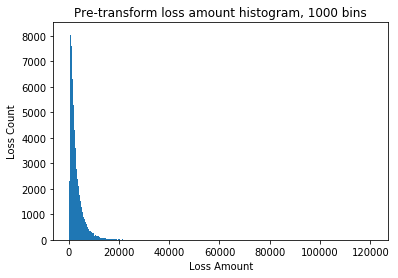

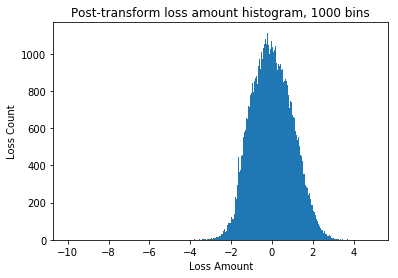

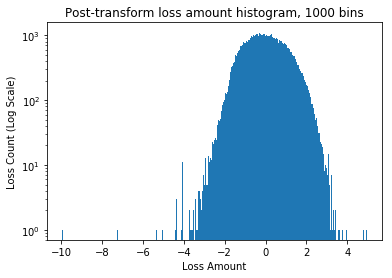

In [8]:
plt.hist(cont_dataset.loss, 1000);
plt.title("Pre-transform loss amount histogram, 1000 bins");
plt.xlabel("Loss Amount");
plt.ylabel("Loss Count");
plt.show();

plt.hist(cont_dataset_scaled.logloss, 1000);
plt.title("Post-transform loss amount histogram, 1000 bins");
plt.xlabel("Loss Amount");
plt.ylabel("Loss Count");
plt.show();

plt.hist(cont_dataset_scaled.logloss, 1000);
plt.title("Post-transform loss amount histogram, 1000 bins");
plt.xlabel("Loss Amount");
plt.ylabel("Loss Count (Log Scale)");
plt.yscale("log");
plt.show(); #loss amounts roughly resemble a 0-centered normal distribution after transformation

In [9]:
cat_dataset = labeled_dataset.iloc[:,1:-15].copy()
cat_dataset.head(n=7) #categorical variables

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,...,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,...,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,...,F,A,AB,DK,A,C,AF,A,I,GK
3,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
4,A,B,A,B,A,A,A,A,B,B,...,G,B,H,C,C,Y,BM,A,K,CK
5,A,B,A,A,A,A,A,A,B,A,...,F,B,BI,CS,A,AS,AE,A,K,DJ
6,A,A,A,A,B,A,A,A,A,A,...,F,B,BI,DK,A,J,AF,A,K,DJ


In [10]:
pd.DataFrame(cat_dataset.nunique(),columns=['Unique Categories']).head(n=7)
pd.DataFrame(cat_dataset.nunique(),columns=['Unique Categories']).tail(n=7)
"There are " + str(list(cat_dataset.nunique()).count(2)) + " binary variables."

,Unique Categories
cat1,2
cat2,2
cat3,2
cat4,2
cat5,2
cat6,2
cat7,2


,Unique Categories
cat110,131
cat111,16
cat112,51
cat113,61
cat114,19
cat115,23
cat116,326


'There are 72 binary variables.'

In [11]:
min_freq=[] #least common category occurences
min2_freq=[] #second least common category occurences
avg_freq=[] #average category occurence number
freq_std=[] #standard deviation in category occurence number
for column in cat_dataset.columns:
    min_freq.append(int(cat_dataset[column].value_counts().min()))
    min2_freq.append(int(cat_dataset[column].value_counts().nsmallest().iloc[1]))
    avg_freq.append(int(cat_dataset[column].value_counts().mean()))
    freq_std.append(int(cat_dataset[column].value_counts().std()))
extra_desc = pd.DataFrame([min_freq,min2_freq,avg_freq,freq_std],columns=cat_dataset.columns)
extra_desc = extra_desc.rename({0:"minfreq",1:"min2freq",2:"avgfreq",3:"freqstd"})
cat_dataset.describe().append(extra_desc)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,...,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,...,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,...,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061
minfreq,46768,81597,10325,59923,64581,56625,4574,11044,75196,28105,...,2,213,1,1,2,30,1,1,1,1
min2freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,2,520,1,1,3,144,1,1,2,1
avgfreq,94159,94159,94159,94159,94159,94159,94159,94159,94159,94159,...,9415,17119,2241,1437,11769,3692,3087,9911,8187,577
freqstd,67020,17765,118559,48417,41829,53081,126692,117542,26817,93414,...,13310,20051,16814,4649,32247,5361,4986,29975,12032,2008


In [12]:
# discard high cardinality variables
threshold = 0.0025
for column in cat_dataset.columns:
    if cat_dataset[column].value_counts().min() < threshold*cat_dataset.shape[0]:
        cat_dataset = cat_dataset.drop([column], axis=1)
        
min_freq=[]
min2_freq=[]
avg_freq=[]
freq_std=[]
for column in cat_dataset.columns:
    min_freq.append(int(cat_dataset[column].value_counts().min()))
    min2_freq.append(int(cat_dataset[column].value_counts().nsmallest().iloc[1]))
    avg_freq.append(int(cat_dataset[column].value_counts().mean()))
    freq_std.append(int(cat_dataset[column].value_counts().std()))
    
extra_desc = pd.DataFrame([min_freq,min2_freq,avg_freq,freq_std],columns=cat_dataset.columns)
extra_desc = extra_desc.rename({0:"minfreq",1:"min2freq",2:"avgfreq",3:"freqstd"})
cat_dataset.describe().append(extra_desc)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat76,cat79,cat80,cat81,cat82,cat83,cat85,cat86,cat87,cat98
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,...,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,...,3,4,4,4,4,4,4,4,4,5
top,A,A,A,A,A,A,A,A,A,A,...,A,B,D,D,B,B,B,B,B,A
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,181347,152929,137505,154385,147536,141534,186005,103852,166992,105492
minfreq,46768,81597,10325,59923,64581,56625,4574,11044,75196,28105,...,788,1668,783,788,2655,4958,514,1589,788,542
min2freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,6183,7064,3492,9013,18805,15788,788,10290,8819,10242
avgfreq,94159,94159,94159,94159,94159,94159,94159,94159,94159,94159,...,62772,47079,47079,47079,47079,47079,47079,47079,47079,37663
freqstd,67020,17765,118559,48417,41829,53081,126692,117542,26817,93414,...,102723,71378,63823,72187,67416,63555,92617,49317,80075,42304


In [13]:
# cat_dataset = cat_dataset.apply(LabelEncoder().fit_transform)
# cat_onehot = OneHotEncoder()
# cat_dataset = cat_onehot.fit_transform(cat_dataset)
# cat_dataset

cat_dataset = pd.get_dummies(data=cat_dataset,drop_first=True) #convert categorial variables to one-hot encoding
cat_dataset.head(n=7)

,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,...,cat86_B,cat86_C,cat86_D,cat87_B,cat87_C,cat87_D,cat98_B,cat98_C,cat98_D,cat98_E
0,0,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [14]:
cleaned_dataset = pd.concat([labeled_dataset.id,cat_dataset,cont_dataset_scaled], axis=1)
cleaned_dataset.head(n=7)

,id,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logloss
0,1,0,1,0,1,0,0,0,0,1,...,-0.84007,-0.92209,1.02303,1.81322,0.36348,0.48464,1.54789,0.98489,-0.28379,0.02084
1,2,0,1,0,0,0,0,0,0,1,...,-0.27114,0.57397,-0.73894,-0.31675,-0.73997,-0.60567,0.55595,-0.85947,-0.60389,-0.65016
2,5,0,1,0,0,1,0,0,0,1,...,-0.94943,-1.06956,-1.23718,-0.93399,-0.53454,-0.57169,-1.39784,1.25269,-0.01110,0.39760
3,10,1,1,0,1,0,0,0,0,1,...,-0.52587,-0.84505,-0.90403,-0.28727,-0.78955,-0.81929,0.52609,0.48059,-0.72226,-1.03410
4,11,0,1,0,1,0,0,0,0,1,...,-1.33126,-1.20779,-1.45666,-1.53740,-1.37708,-1.38921,-1.16144,-0.28366,-0.09417,0.29452
5,13,0,1,0,0,0,0,0,0,1,...,-0.46965,-1.09328,-0.12797,0.04032,-0.60420,-0.63937,-0.69505,1.03860,0.72503,1.05941
6,14,0,0,0,0,1,0,0,0,0,...,-0.67920,-1.20779,-0.44565,-0.13889,-0.75658,-0.67279,-0.70919,-0.50693,-0.65601,-0.80473


In [15]:
def test_split(id, seed, test_proportion):
    if type(test_proportion) not in [float, int] or test_proportion > 1 or test_proportion < 0:
        raise ValueError("Test proportion must be a real number between 0 and 1")
    test = str(id) + str(seed)
    test_digest = hashlib.md5(test.encode("ascii")).hexdigest()
    test_hex = int(test_digest[-6:], 16) #last 6 digits only
    split = test_hex/0xFFFFFF
    if split > test_proportion:
        return 0
    else:
        return 1

cleaned_dataset['split'] = cleaned_dataset['id'].map(lambda x: test_split(id = x, seed = 'testing set', test_proportion = 0.20))
cleaned_dataset['split'].sum()/cleaned_dataset.shape[0] #verify split percentage is correct

test = cleaned_dataset.loc[(cleaned_dataset.split == 1)]
train_valid = cleaned_dataset.loc[(cleaned_dataset.split == 0)].copy()
train_valid['split'] = train_valid['id'].map(lambda x: test_split(id = x, seed = 'validation set', test_proportion = 0.25))
train_valid['split'].sum()/train_valid.shape[0] #verify split percentage is correct
train = train_valid.loc[(train_valid.split == 0)]
valid = train_valid.loc[(train_valid.split == 1)]


train_x = train.iloc[:,1:-3].copy()
train_y = train.iloc[:,-2:-1].copy()
valid_x = valid.iloc[:,1:-3].copy()
valid_y = valid.iloc[:,-2:-1].copy()
test_x = test.iloc[:,1:-3].copy()
test_y = test.iloc[:,-2:-1].copy()

0.1991631177051583

0.24872026098718936

In [ ]:
tf.reset_default_graph()
tf_x = tf.placeholder(tf.float32, [None, train_x.shape[1]])
tf_y = tf.placeholder(tf.float32, [None, train_y.shape[1]])
    
layer1 = tf.layers.dense(tf_x, 50, tf.nn.leaky_relu)
layer2 = tf.layers.dense(layer1, 25, tf.nn.leaky_relu)
layer3 = tf.layers.dense(layer2, 13, tf.nn.leaky_relu)
layer4 = tf.layers.dense(layer3, 7, tf.nn.leaky_relu)
output = tf.layers.dense(layer4, 1)


loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.AdamOptimizer(0.025)
train_op = optimizer.minimize(loss)
loss_history_train = []
loss_history_valid = []
valid_min = 0.6

sess = tf.Session()
# sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, './params')
for epoch in range(1000000):       
#     valid_loss = sess.run(loss, {tf_x: valid_x, tf_y: valid_y})
#     loss_history_valid.append(valid_loss)
#     train_loss = sess.run(loss, {tf_x: train_x, tf_y: train_y})
#     loss_history_train.append(train_loss)

    random_rows = np.random.choice(train.shape[0], 30, replace=False)
    
    valid_loss = sess.run(loss, {tf_x: valid_x, tf_y: valid_y})
    if valid_loss < valid_min:
        saver.save(sess, './params', write_meta_graph=False)
        valid_min = valid_loss
    sess.run(train_op, {tf_x: train_x.iloc[random_rows, :], tf_y: train_y.iloc[random_rows, :]})
#     sess.run(train_op, {tf_x: train_x, tf_y: train_y})

#     random_rows = np.random.choice(train.shape[0], 50, replace=False)
#     sess.run(train_op, {tf_x: train_x.iloc[random_rows, :], tf_y: train_y.iloc[random_rows, :]})



valid_loss = sess.run(loss, {tf_x: valid_x, tf_y: valid_y})
train_loss = sess.run(loss, {tf_x: train_x, tf_y: train_y})

train_pred_nn = sess.run(output, {tf_x: train_x})
sess.close()

train_pred_nn = pd.DataFrame(train_pred_nn, columns = ['loglosspred'])
print("Mean squared error on the training set is %f" % train_loss)
print("Mean squared error on the validation set is %f" % valid_loss)

INFO:tensorflow:Restoring parameters from ./params


'./params'

In [17]:
actual_pred = np.exp(loss_scaler.inverse_transform(train_pred_nn))
train_y_actual = np.exp(loss_scaler.inverse_transform(train_y))
# actual_pred = np.exp(train_pred_nn)
# train_y_actual = np.exp(train_y)

mean_squared_error(train_y_actual, actual_pred) ** 0.5

train_pred_nn.head()
train_y.head()

1844.3032360948562

,loglosspred
0,0.72250
1,-0.77298
2,1.04267
3,-0.79057
4,1.54506


,logloss
2,0.39760
3,-1.03410
5,1.05941
6,-0.80473
9,1.28660


In [18]:
# print("Mean squared error on the training set is %f" % train_loss)
# print("Mean squared error on the validation set is %f" % valid_loss)

# plt.plot(loss_history_train, 'b');
# plt.plot(loss_history_valid, 'r');
# plt.title("Training(Blue) and valid(Red) MSE: all epochs");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.yscale('log');
# plt.show();

# plt.plot(np.arange(1,51), loss_history_train[:50], 'b');
# plt.plot(np.arange(1,51), loss_history_valid[:50], 'r');
# plt.title("Training(Blue) and valid(Red) MSE through epochs 0-50");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.show();


# plt.plot(np.arange(51,201), loss_history_train[50:200], 'b');
# plt.plot(np.arange(51,201), loss_history_valid[50:200], 'r');
# plt.title("Training(Blue) and valid(Red) MSE through epochs 50-200");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.show();

# plt.plot(np.arange(1001,2001),loss_history_train[1000:2000], 'b');
# plt.plot(np.arange(1001,2001),loss_history_valid[1000:2000], 'r');
# plt.title("Training(Blue) and valid(Red) MSE through epochs 1000-2000");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.show();

# plt.plot(np.arange(2001,4751),loss_history_train[2000:4750], 'b');
# plt.plot(np.arange(2001,4751),loss_history_valid[2000:4750], 'r');
# plt.title("Training(Blue) and valid(Red) MSE through epochs 2000-4750");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.show();

# plt.plot(loss_history_train[-250:], 'b');
# plt.plot(loss_history_valid[-250:], 'r');
# plt.title("Training(Blue) and valid(Red) MSE through final 250 epochs");
# plt.xlabel("Epoch");
# plt.ylabel("Mean Squared Error");
# plt.show();

In [19]:
train_pred_nn.head()
train_y.head()

,loglosspred
0,0.72250
1,-0.77298
2,1.04267
3,-0.79057
4,1.54506


,logloss
2,0.39760
3,-1.03410
5,1.05941
6,-0.80473
9,1.28660
